In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


In [2]:
files = open('../static/data/events/list_of_files.txt', "r")
files = files.readlines()
files = [f.replace("\n","") for f in files]
files

['events_England.json',
 'events_Italy.json',
 'events_European_Championship.json',
 'events_Spain.json',
 'events_France.json',
 'events_World_Cup.json',
 'events_Germany.json']

In [3]:
# events_England.json
# events_Italy.json
# events_European_Championship.json
# events_Spain.json
# events_France.json
# events_World_Cup.json
# events_Germany.json

with open('../static/data/events/events_Italy.json') as f:
    data = json.load(f)

data_df = pd.DataFrame(data)
data_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961


In [4]:
#Identify the goals and add them to a column
shots=data_df[data_df['subEventName'].isin(['Shot','Free kick shot','Penalty'])]
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
68,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",21077,"[{'y': 41, 'x': 80}, {'y': 0, 'x': 0}]",2575959,Shot,3172,1H,193.924279,100,180424028
90,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1210}, {'id'...",8327,"[{'y': 33, 'x': 95}, {'y': 100, 'x': 100}]",2575959,Shot,3158,1H,250.843152,100,180424079
213,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",20879,"[{'y': 63, 'x': 72}, {'y': 100, 'x': 100}]",2575959,Shot,3158,1H,633.577774,100,180424208
426,10,Shot,"[{'id': 1901}, {'id': 402}, {'id': 201}, {'id'...",23149,"[{'y': 62, 'x': 91}, {'y': 100, 'x': 100}]",2575959,Shot,3158,1H,1359.469422,100,180424444
435,10,Shot,"[{'id': 1901}, {'id': 401}, {'id': 1216}, {'id...",295176,"[{'y': 26, 'x': 86}, {'y': 0, 'x': 0}]",2575959,Shot,3172,1H,1412.601525,100,180424409
...,...,...,...,...,...,...,...,...,...,...,...,...
646870,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",116269,"[{'y': 45, 'x': 95}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,1152.032980,100,253566542
646904,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1212}, {'id'...",3548,"[{'y': 38, 'x': 93}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,1251.730517,100,253566586
647169,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",21177,"[{'y': 46, 'x': 90}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,2065.034482,100,253566910
647218,10,Shot,"[{'id': 402}, {'id': 1212}, {'id': 1802}]",349102,"[{'y': 32, 'x': 79}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,2367.252041,100,253566961


In [5]:
shots=shots.assign(Goal = 0)
for i,shot in shots.iterrows():
    for shottags in shot['tags']:
            #Tags contain that its a goal
            if shottags['id']==101:
                shots.at[i,'Goal']=1
sum(shots['Goal'])
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Goal
68,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",21077,"[{'y': 41, 'x': 80}, {'y': 0, 'x': 0}]",2575959,Shot,3172,1H,193.924279,100,180424028,0
90,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1210}, {'id'...",8327,"[{'y': 33, 'x': 95}, {'y': 100, 'x': 100}]",2575959,Shot,3158,1H,250.843152,100,180424079,0
213,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",20879,"[{'y': 63, 'x': 72}, {'y': 100, 'x': 100}]",2575959,Shot,3158,1H,633.577774,100,180424208,0
426,10,Shot,"[{'id': 1901}, {'id': 402}, {'id': 201}, {'id'...",23149,"[{'y': 62, 'x': 91}, {'y': 100, 'x': 100}]",2575959,Shot,3158,1H,1359.469422,100,180424444,0
435,10,Shot,"[{'id': 1901}, {'id': 401}, {'id': 1216}, {'id...",295176,"[{'y': 26, 'x': 86}, {'y': 0, 'x': 0}]",2575959,Shot,3172,1H,1412.601525,100,180424409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
646870,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",116269,"[{'y': 45, 'x': 95}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,1152.032980,100,253566542,0
646904,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1212}, {'id'...",3548,"[{'y': 38, 'x': 93}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,1251.730517,100,253566586,0
647169,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",21177,"[{'y': 46, 'x': 90}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,2065.034482,100,253566910,1
647218,10,Shot,"[{'id': 402}, {'id': 1212}, {'id': 1802}]",349102,"[{'y': 32, 'x': 79}, {'y': 0, 'x': 0}]",2576338,Shot,3193,2H,2367.252041,100,253566961,0


In [6]:
match_list=shots['matchId'].unique().tolist()
num_matches=len(match_list)
shots_in_match=[]
goals_in_match=[]
for match in match_list:
    shots_in_match.append(len(shots[shots['matchId']==match]))
    goals_in_match.append(len(shots[np.logical_and(shots['matchId']==match, (shots['Goal']==1))]))
    

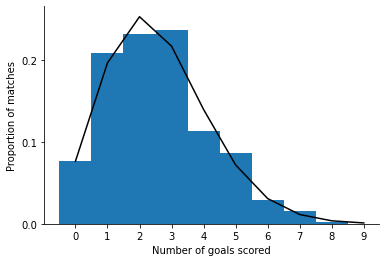

In [7]:
#Set up figure
fig=plt.figure()
from pylab import rcParams
rcParams['figure.figsize'] = 12/2.54, 8/2.54
ax=fig.add_subplot(1,1,1)

#Make histogram of goals/shots
mean_goals=np.mean(goals_in_match)
goals_dist,goals_bins=np.histogram(goals_in_match, bins = np.arange(-0.5,10.5))
goals_dist=goals_dist/num_matches

#Make Poisson distribution
g=np.arange(0,10)
Poisson_g=np.zeros(10)
for i,k in enumerate(g):
    Poisson_g[i] = np.power(mean_goals,k)*np.exp(-mean_goals)/np.math.factorial(k)

#Plot data
plt.hist(g-0.5,9, weights=goals_dist)
plt.plot(g,Poisson_g, color='black')
ax.set_yticks(np.arange(0,0.3,0.1)) 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,10,1))
ax.set_ylabel('Proportion of matches')
ax.set_xlabel('Number of goals scored')
plt.show()

988


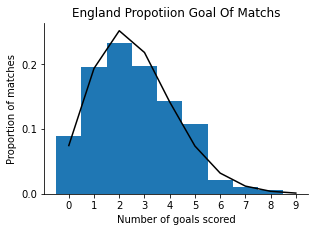

978


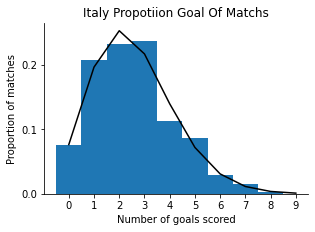

133


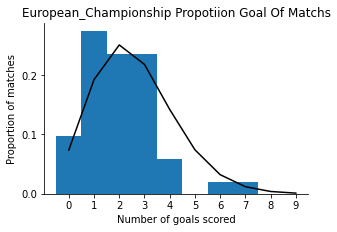

993


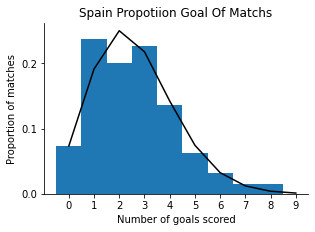

998


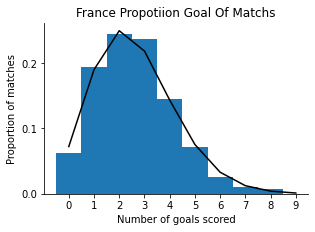

183


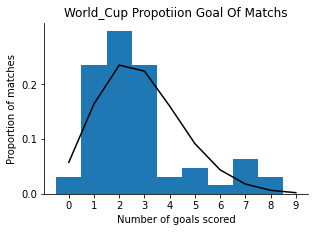

833


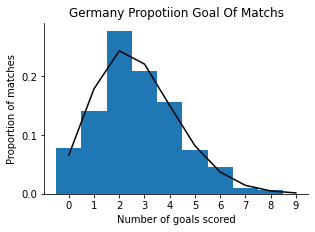

In [9]:
for file in files:
    with open('../static/data/events/' + file) as f:
        data = json.load(f)

    data_df = pd.DataFrame(data)
    data_df.head()
    
    #Identify the goals and add them to a column
    shots=data_df[data_df['subEventName'].isin(['Shot','Free kick shot','Penalty'])]

    shots=shots.assign(Goal = 0)
    for i,shot in shots.iterrows():
        for shottags in shot['tags']:
                #Tags contain that its a goal
                if shottags['id']==101:
                    shots.at[i,'Goal']=1
    print(sum(shots['Goal']))
    
    match_list=shots['matchId'].unique().tolist()
    num_matches=len(match_list)
    shots_in_match=[]
    goals_in_match=[]
    for match in match_list:
        shots_in_match.append(len(shots[shots['matchId']==match]))
        goals_in_match.append(len(shots[np.logical_and(shots['matchId']==match, (shots['Goal']==1))]))
        
    #Set up figure
    fig=plt.figure()
    from pylab import rcParams
    rcParams['figure.figsize'] = 12/2.54, 8/2.54
    ax=fig.add_subplot(1,1,1)

    #Make histogram of goals/shots
    mean_goals=np.mean(goals_in_match)
    goals_dist,goals_bins=np.histogram(goals_in_match, bins = np.arange(-0.5,10.5))
    goals_dist=goals_dist/num_matches

    #Make Poisson distribution
    g=np.arange(0,10)
    Poisson_g=np.zeros(10)
    for i,k in enumerate(g):
        Poisson_g[i] = np.power(mean_goals,k)*np.exp(-mean_goals)/np.math.factorial(k)

    #Plot data
    plt.hist(g-0.5,9, weights=goals_dist)
    plt.plot(g,Poisson_g, color='black')
    ax.set_yticks(np.arange(0,0.3,0.1)) 
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_position('zero')    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(np.arange(0,10,1))
    ax.set_ylabel('Proportion of matches')
    ax.set_xlabel('Number of goals scored')
    plt.title(file.replace("events_",'').replace(".json",'') + " Propotiion Goal Of Matchs")
    fig.savefig('../static/img/ProGoalOf' + file.replace("events_",'').replace(".json",'') +'Match.pdf' , dpi=None, bbox_inches="tight")
    plt.show()